# Google PlayStore Data Exploration And Visualization

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [160]:
df=pd.read_csv('gpsclean.csv',index_col=0)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


## No. of app on playstore vs category

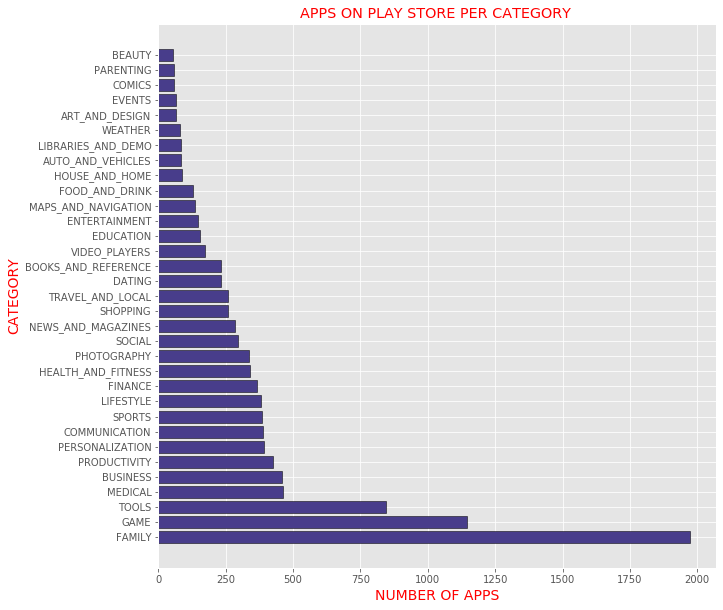

In [20]:
d=df['Category'].value_counts()
l=d.keys()
values = [d[i] for i in l]
plt.style.use('ggplot')
fig,ax = plt.subplots()
ax.barh(l,d,color='darkslateblue',edgecolor='black')
ax.set_xlabel('NUMBER OF APPS',color='red',fontsize=14)
ax.set_ylabel('CATEGORY',color='red',fontsize=14)
ax.set_title('APPS ON PLAY STORE PER CATEGORY ',color='red')
fig.set_size_inches([10,10])
plt.show()
# for i in range(len(values)):
#     ax.text(100, i + .25, values[i], color='blue', fontweight='bold')

### **Insight -->** The above graph displays total no. of apps per category present on google playstore. As per the graph Family Category is having hightest no. of apps on playstore whereas on the contradictory Beauty Category has minimum.

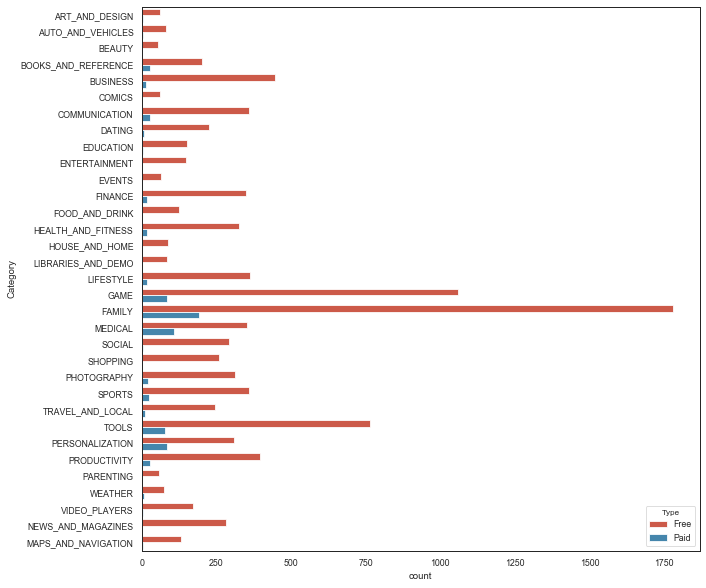

In [59]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(y='Category',hue='Type',data=df)
sns.set_style('white')
plt.show()

### **Insight -->  This graph shows the Total no. of Free and Paid apps in each category. And seeing the graph we get that max no. of free and paid apps are in Family Category**

## Category vs Rating

               Category    Rating
7                DATING  3.912603
4              BUSINESS  3.950909
29                TOOLS  3.992376
18            LIFESTYLE  4.010682
19  MAPS_AND_NAVIGATION  4.010825
31        VIDEO_PLAYERS  4.025866
21   NEWS_AND_MAGAZINES  4.042009
17   LIBRARIES_AND_DEMO  4.047476
30     TRAVEL_AND_LOCAL  4.048824
20              MEDICAL  4.050670
12              FINANCE  4.071957
6         COMMUNICATION  4.076704
13       FOOD_AND_DRINK  4.089700
25         PRODUCTIVITY  4.109880
1     AUTO_AND_VEHICLES  4.110132
16       HOUSE_AND_HOME  4.118878
28               SPORTS  4.121654
9         ENTERTAINMENT  4.126174
11               FAMILY  4.127180
5                COMICS  4.137392
2                BEAUTY  4.142254
24          PHOTOGRAPHY  4.161468
27               SOCIAL  4.178250
3   BOOKS_AND_REFERENCE  4.179887
22            PARENTING  4.186962
32              WEATHER  4.190883
15   HEALTH_AND_FITNESS  4.192545
23      PERSONALIZATION  4.193873
10            

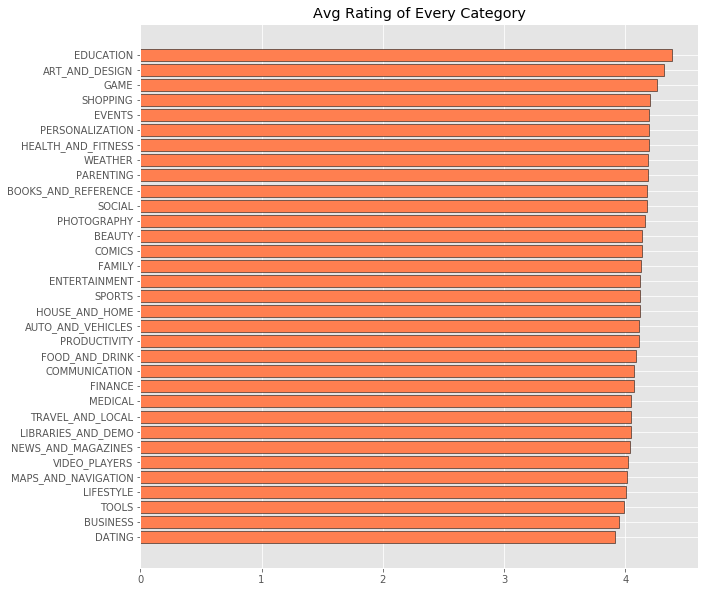

In [22]:
x = df[['Category','Rating']].groupby('Category').agg('mean').reset_index()
x=x.sort_values('Rating')
print(x)
fig,ax=plt.subplots(figsize=(10,10))
ax.barh(x['Category'],x['Rating'],color='Coral',edgecolor='black')
ax.set_title('Avg Rating of Every Category')
plt.show()

### Insight --> This graph shows the avergae rating recieved on apps against different categories. Out of all the given categories, the highest average rating of 4.38 is given to the education apps 

**Insight --> This graph shows the average rating of each category in google playstore. Education have largest avg rating and Dating being the lowest.**

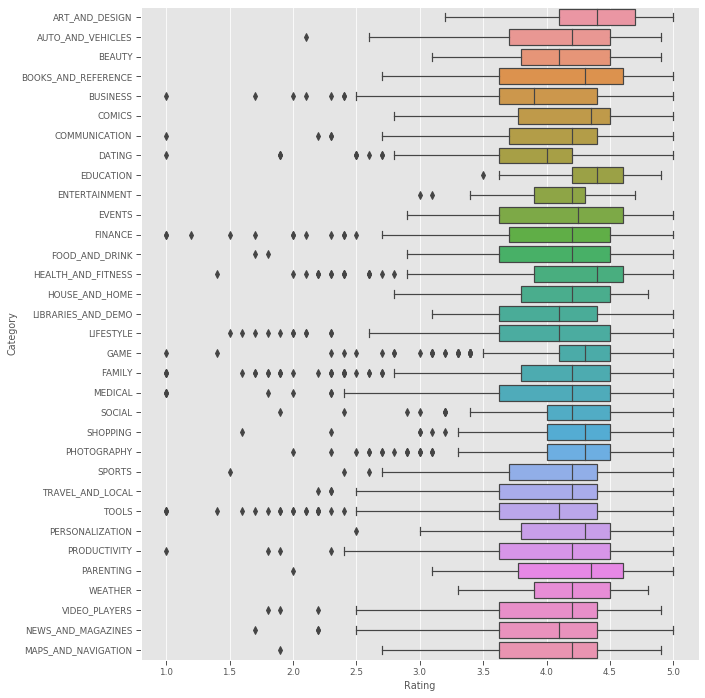

In [49]:
fig,ax = plt.subplots(figsize=(10,12))
sns.boxplot(y='Category',x='Rating',data=df)

### ** Insight --> This graph shows the average rating of each category present on playstore, where 

### Category vs Reviews

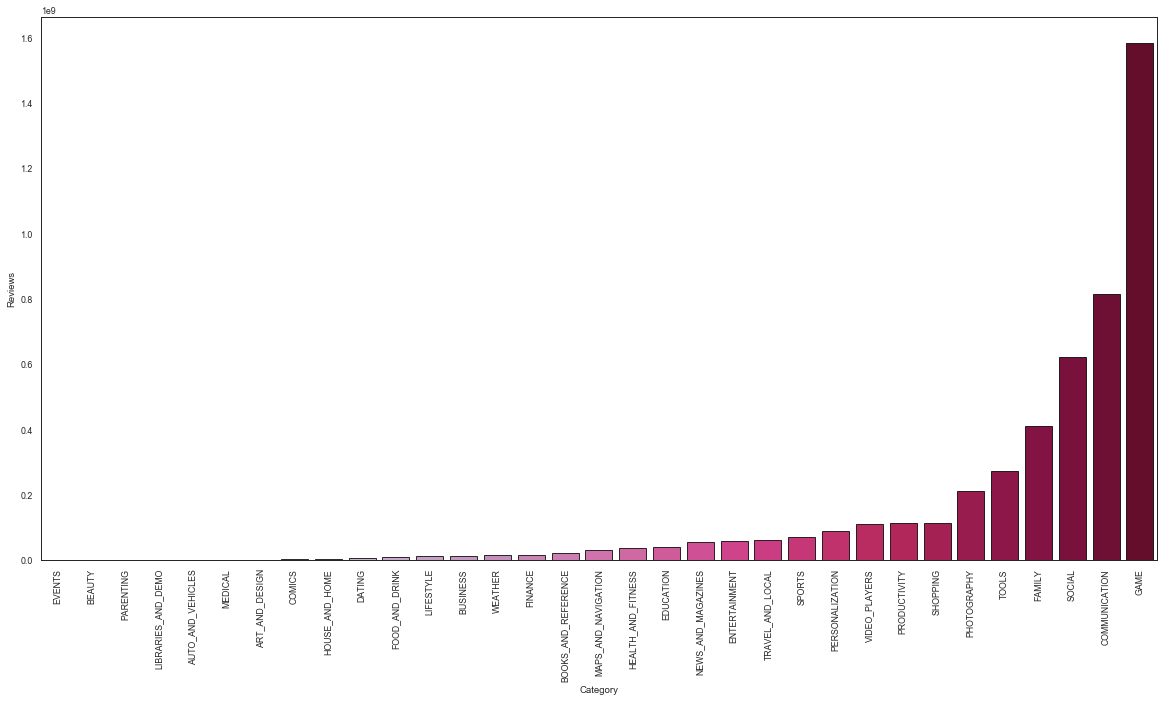

In [84]:
x = df[['Category','Reviews']].groupby('Category').agg('sum')
x = x.reset_index().sort_values('Reviews')
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(x='Category',y='Reviews',data=x,edgecolor='black',palette='PuRd')
plt.xticks(rotation=90)
plt.show()

### **Insight --> This graph shows the reviews recieved on the apps as per different category. It reflects that the gaming apps present on playstore receive maximum reviews. It is followed by communication apps and social apps.** 

### Category vs Size

               Category       Size
2                BEAUTY   0.633203
5                COMICS   0.671610
32              WEATHER   0.730536
0        ART_AND_DESIGN   0.749023
10               EVENTS   0.777272
17   LIBRARIES_AND_DEMO   0.887214
16       HOUSE_AND_HOME   1.061075
22            PARENTING   1.187207
1     AUTO_AND_VEHICLES   1.467540
19  MAPS_AND_NAVIGATION   1.752297
9         ENTERTAINMENT   1.920703
31        VIDEO_PLAYERS   2.057677
13       FOOD_AND_DRINK   2.166504
8             EDUCATION   2.253669
3   BOOKS_AND_REFERENCE   2.560651
21   NEWS_AND_MAGAZINES   2.747169
6         COMMUNICATION   3.044827
26             SHOPPING   3.174987
7                DATING   3.442009
27               SOCIAL   3.626124
25         PRODUCTIVITY   3.841023
23      PERSONALIZATION   3.916584
24          PHOTOGRAPHY   4.307973
30     TRAVEL_AND_LOCAL   4.622712
18            LIFESTYLE   4.970868
12              FINANCE   5.374991
4              BUSINESS   5.653077
15   HEALTH_AND_FITN

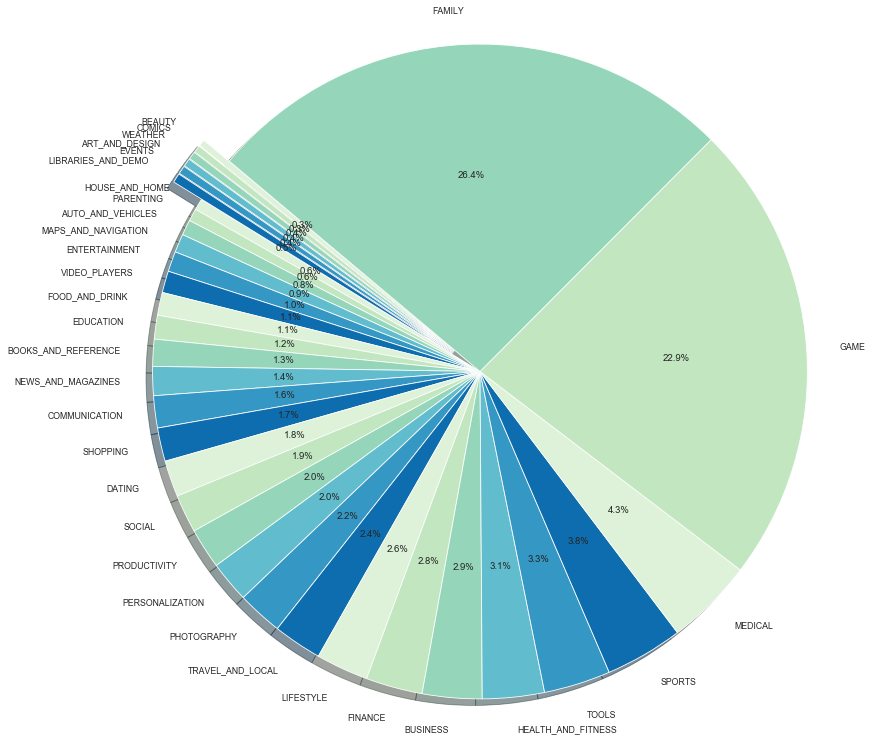

In [113]:
x=df[['Category','Size']].groupby('Category').agg('sum').reset_index().sort_values('Size')
x['Size'] = x['Size']/(1024*1024)
print(x)

# Data to plot
labels = x['Category']
sizes = x['Size']
explode=[]
for i in x['Size']:
    if i < 1:
        explode.append(0.1)
    else:
        explode.append(0.0)
explode=tuple(explode)

# Plot
fig,ax = plt.subplots(figsize=(13,13))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


In [27]:
x = df[['Category','Installs']]
x = x.groupby('Category').agg(sum)
max = int(x.max())
min = int(x.min())
print(x[x['Installs'] == max])
print(x[x['Installs'] == min])

             Installs
Category             
GAME      35086024415
          Installs
Category          
EVENTS    15973161


### Category vs Type

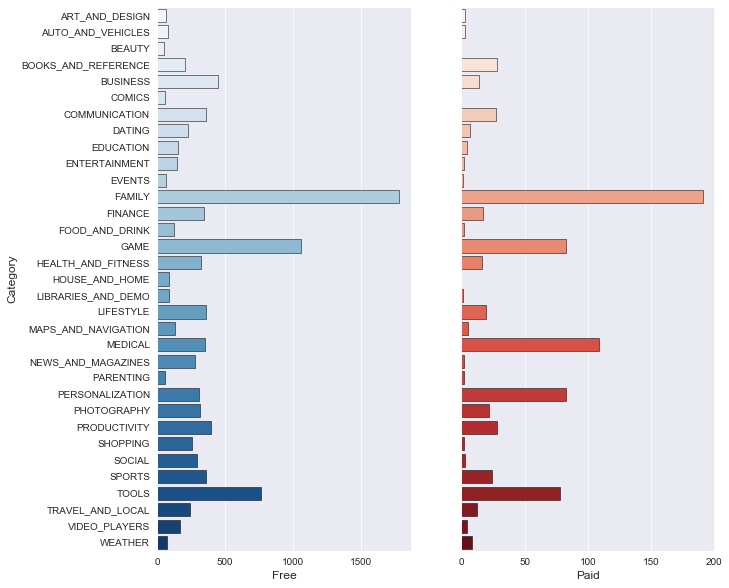

In [50]:
x = df[['Category','Type']]
# category = df['Category'].unique()
x = x.groupby(['Category','Type']).agg(len)
x = x.unstack(level=-1,fill_value = 0.0)
x = x.reset_index()
Free = x[['Category','Free']]
Paid = x[['Category','Paid']]
fig,ax = plt.subplots(1,2,figsize=(10,10))
plt.style.use('ggplot')
sns.set_style('darkgrid')
sns.barplot(x="Free", y="Category", data=Free,
             color="b",ax=ax[0],edgecolor='Black',palette='Blues')

sns.barplot(x="Paid", y="Category", data=Paid,
             color="r",ax=ax[1],edgecolor='Black',palette='Reds')
sns.set_context('talk')
ax[1].set_yticks([])
ax[1].set_ylabel('')
plt.show()



### **Insights --> This graph shows total no. of apps present on Google playstore for different categories. It shows that the playstore have maximum category of family apps for both free and paid versions.**

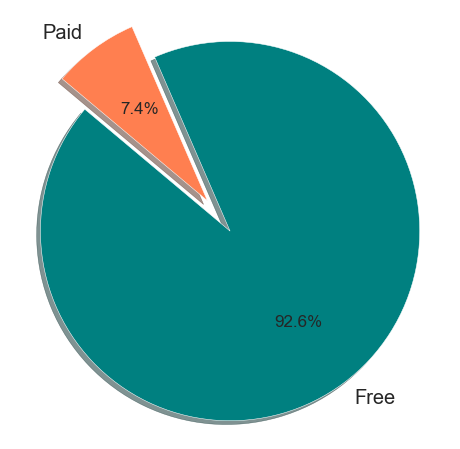

In [81]:
c=df['Type'].value_counts(normalize=True)*100
activities = c.keys()
explode = (0,0.2)
fig,ax = plt.subplots(figsize=(8,8))
patches,texts,autotxts = ax.pie(c,explode=explode, labels=activities,autopct='%1.1f%%', shadow=True, startangle=140,
                                colors = ['teal','coral'])
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
autotxts[0].set_fontsize(17)
autotxts[1].set_fontsize(17)
plt.axis('equal')
plt.show()


### **This graph shows that out of the total no. of apps present on google playstore, 92.6 % apps are free while 7.4 % of the apps are paid.**

### Category vs Content Rating

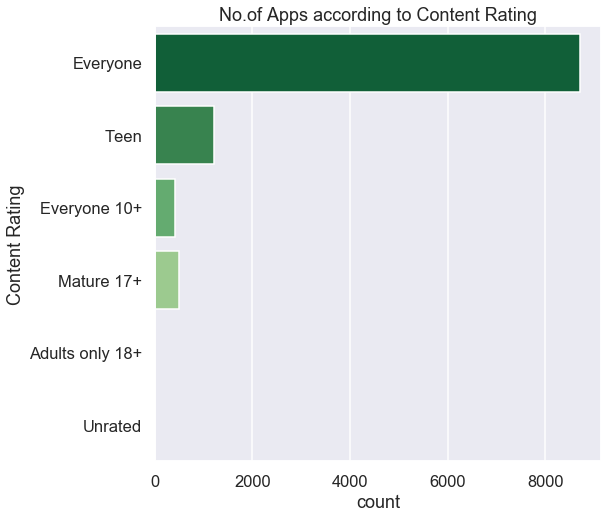

In [109]:
x = df[['Category','Content Rating']]
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(y='Content Rating',data=x,palette='YlGn_r')
ax.set_title('No.of Apps according to Content Rating')
plt.show()

### **This graph shows approx. 9000 application are meant for everyone i.e. any age group can make use of this apps.**

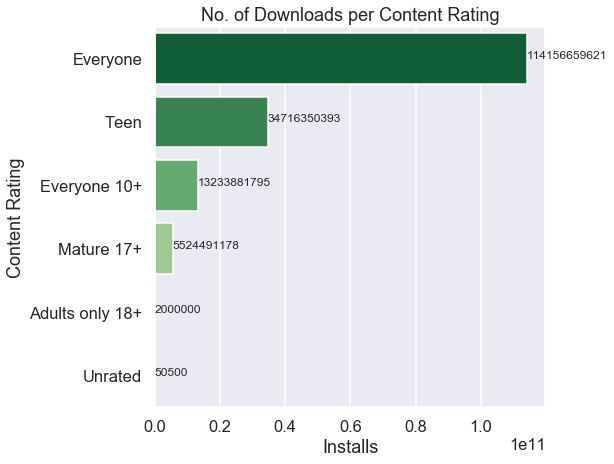

In [116]:
x = df[['Content Rating','Installs']]
x = x.groupby('Content Rating').agg(sum)
x.sort_values(by='Installs',inplace=True,ascending=False)
x.reset_index(inplace=True)

fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(x='Installs',y='Content Rating',data=x,palette='YlGn_r')
val = x['Installs']
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)
plt.title('No. of Downloads per Content Rating')    
plt.show()

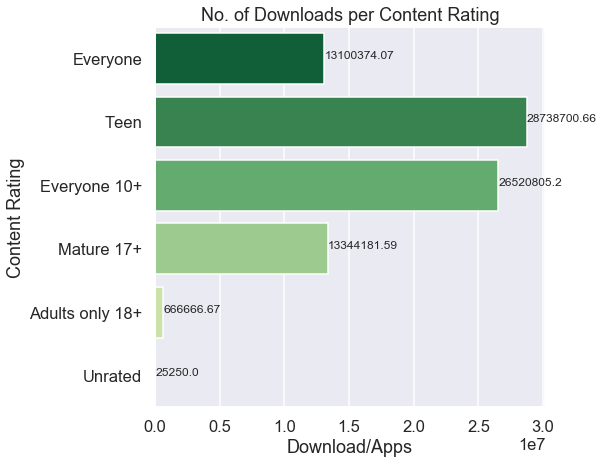

In [139]:
x = df[['Content Rating','Installs']]
total = x['Content Rating'].value_counts()

x = x.groupby('Content Rating').agg(sum)
x.sort_values(by='Installs',inplace=True,ascending=False)
x.reset_index(inplace=True)
x['Total_Apps'] = total.values
x['Download/Apps'] = x['Installs']/x['Total_Apps']
x = x.round(2)

fig,ax = plt.subplots(figsize=(7,7))
sns.barplot(x='Download/Apps',y='Content Rating',data=x,palette='YlGn_r')
val = x['Download/Apps']
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)
plt.title('No. of Downloads per Content Rating')    
plt.show()

### Rating Vs Reviews

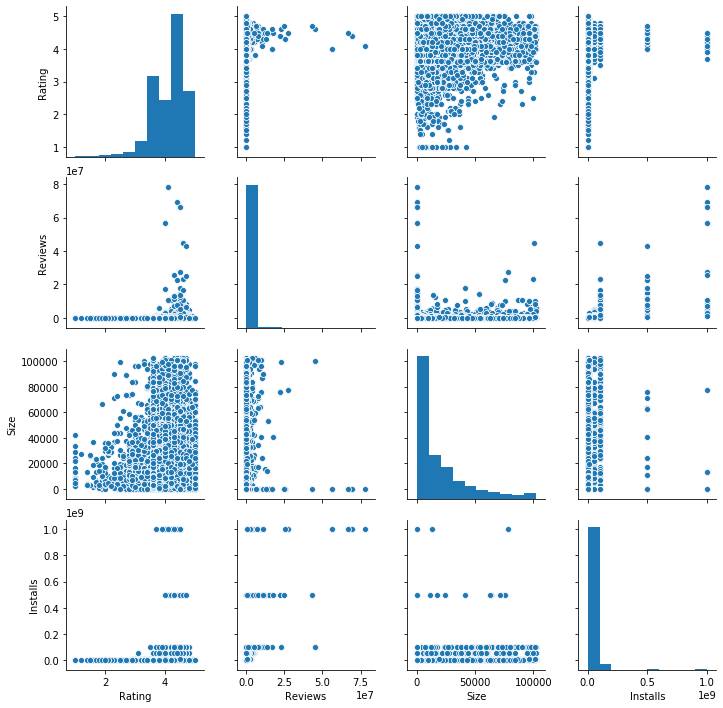

In [26]:
x = df[['Rating','Reviews','Size','Installs']]
sns.pairplot(x)
plt.show()

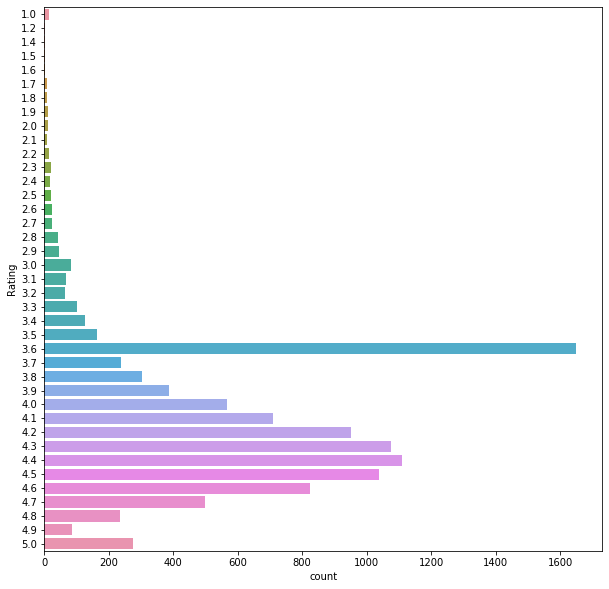

In [70]:
x = df[['Rating']]
x.Rating = x.Rating.replace(to_replace = 3.621771217712182 , value = 3.6)
# index = x[x['Rating'] == 3.621771217712182].index
# x.Rating.loc[index] = 3.6
# x.Rating.unique()
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(y = 'Rating',data=x)
plt.show()


### **Insights --> This graph shows the ratings given to the apps present on Google playstore. The graph represents that approximately 1600 apps present on playstore have a customer rating of 3.6.**

## Size vs Installs

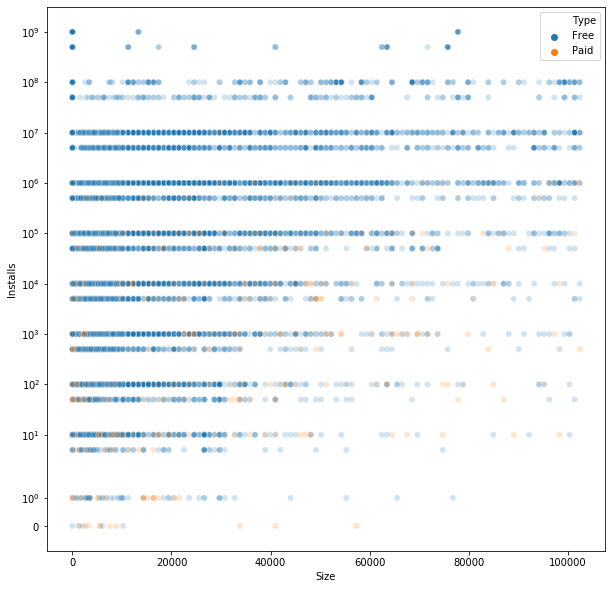

In [101]:
data = df[['Size','Installs','Type']]
# size_max = x.Size.max()
# installs_max = x.Installs.max()
# x.Size = x.Size/size_max
# x.Installs = x.Installs/installs_max

fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x ='Size', y='Installs',data=data,alpha = 0.2,ax=ax,hue='Type')
plt.yscale('symlog')
plt.show()

## andriod Version

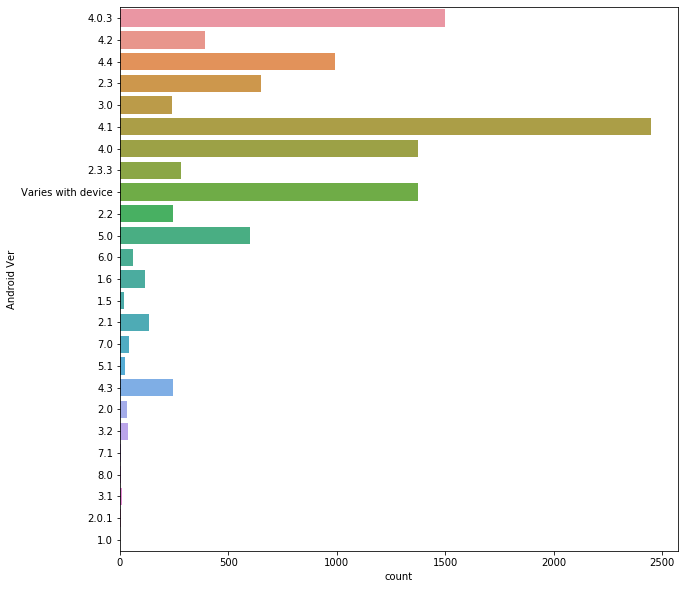

In [110]:
x = df[['Android Ver']]
# x.unique()
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(y = 'Android Ver',data=x)
plt.show()


### **Insights --> This graph reprsents the android versions a mobile phone needed to download the apps from the playstore. It shows that most of the apps present on playstore requires a minimum of 4.1 android version to get downloaded.**

## Rating and Andriod Version


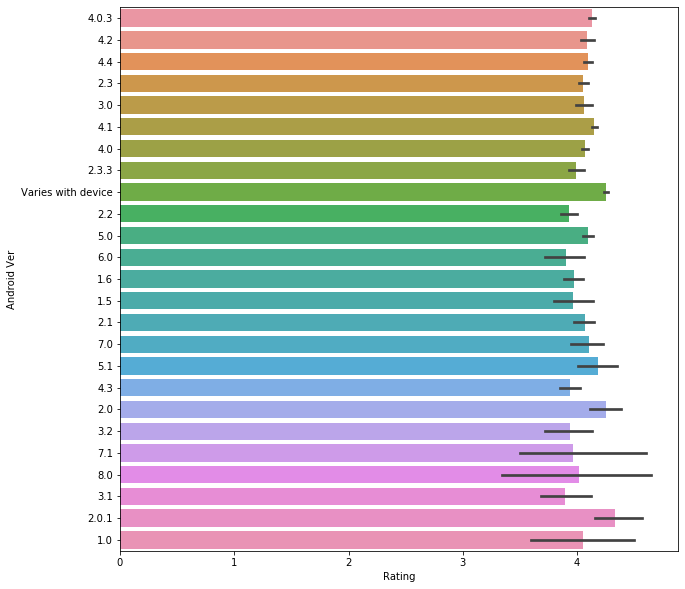

In [25]:
x = df[['Rating','Android Ver','Type']]
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Rating',y='Android Ver',data=x)
plt.show()

### **Insights --> This graph reprsents the relation between android versions and rating.  It shows that most of the apps present on playstore having 2.0.1 version are having highest rating.**

In [162]:
x = df[['Last Updated']]
x['month_year'] =  pd.to_datetime(x['Last Updated']).dt.to_period('M')
y = x.month_year.value_counts()
y = y.reset_index()
y = y.rename(columns={'index':'month_year','month_year':'count'})
print(y.head())

  month_year  count
0    2018-07   2864
1    2018-08   1275
2    2018-06   1006
3    2018-05    739
4    2018-04    429


C:\Users\SHADOW\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
import plotly.express as px
fig = px.treemap(y, path=['month_year'], values=x['month_year'].value_counts(),title='Tree Of Most Common Last Update')
fig.show()

### **Insight --> This graph represents the time when the apps were last updated on Google Playstore. It shows that the max. no. of apps were updated on July 2018 with the count of 2864 apps. It was followed by 1275 apps which was being updated on August 2018.**


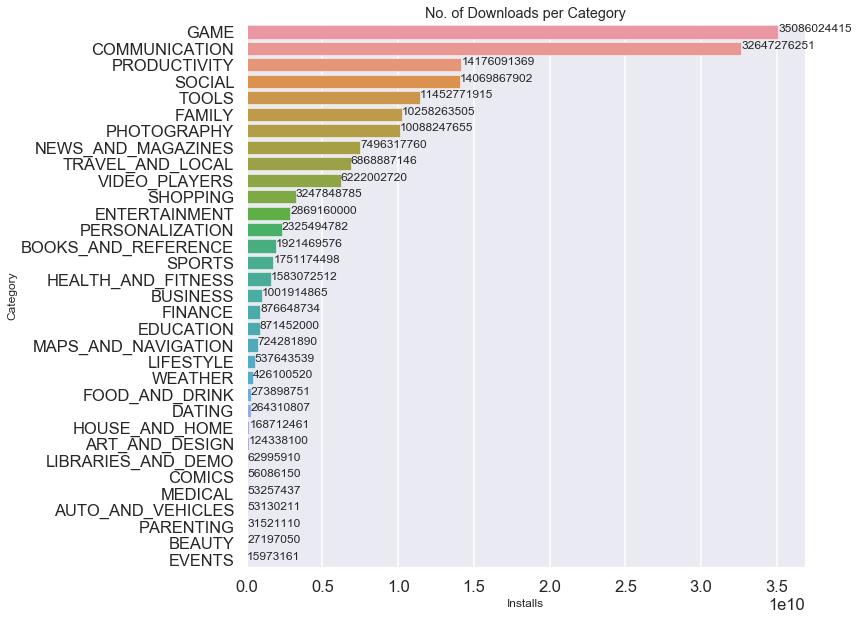

In [156]:
x = df[['Category','Installs']]
x = x.groupby('Category').agg(sum)
x.sort_values(by='Installs',ascending=False,inplace = True)
x.reset_index(inplace=True)
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Installs',y='Category',data=x)
val = x['Installs']
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)
plt.title('No. of Downloads per Category')    
plt.show()


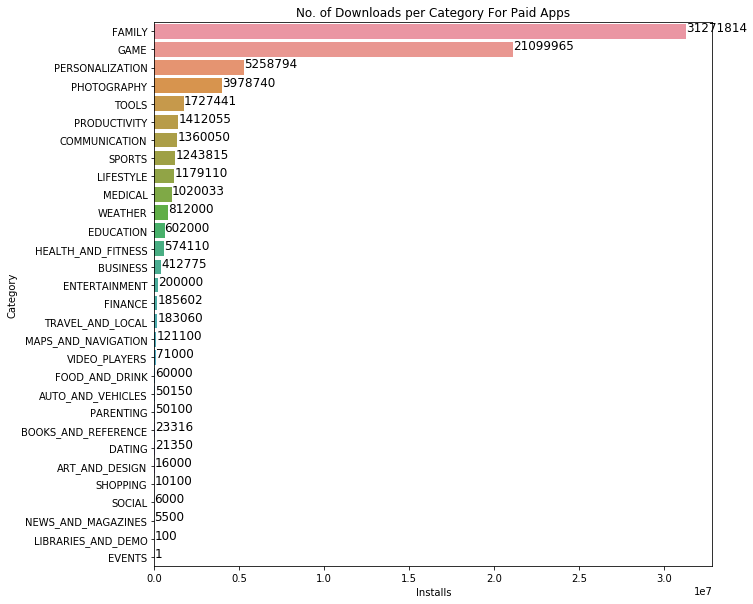

In [45]:
x = df[['Category','Installs','Type']]
x = x[x['Type']=='Paid']
x = x[['Category','Installs']]
x = x.groupby('Category').agg(sum)
x.sort_values(by='Installs',ascending=False,inplace = True)
x.reset_index(inplace=True)
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Installs',y='Category',data=x)
val = x['Installs']
for i in range(len(val)):
    plt.text(x = val[i]+0.7, y = i, s = val[i], size = 12)
plt.title('No. of Downloads per Category For Paid Apps')    
plt.show()


             Category  Rating
0  NEWS_AND_MAGAZINES    4.80
1           EDUCATION    4.75
2      ART_AND_DESIGN    4.73
3       ENTERTAINMENT    4.60
4            SHOPPING    4.50
              Category  Rating
0            EDUCATION    4.37
1       ART_AND_DESIGN    4.30
2                 GAME    4.25
3  BOOKS_AND_REFERENCE    4.23
4            PARENTING    4.22


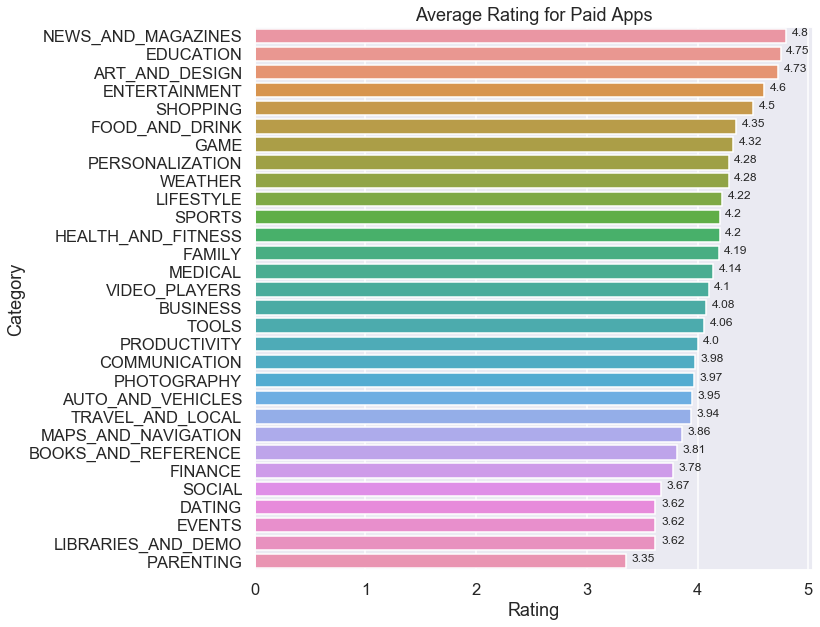

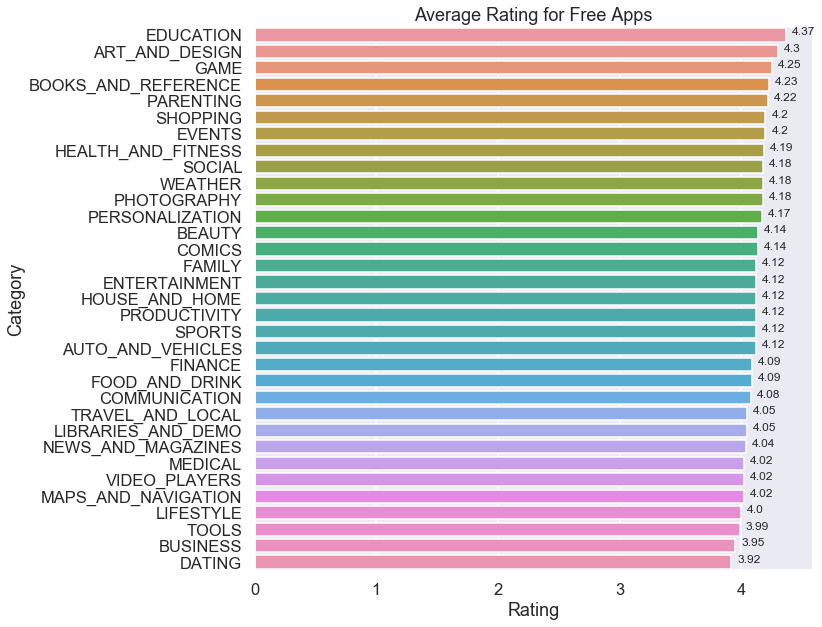

In [64]:
x = df[['Category','Rating','Type']]
paid = x[x['Type']=='Paid']
paid = paid[['Category','Rating']]
paid = paid.groupby('Category').agg('mean')
paid.sort_values(by='Rating',ascending=False,inplace = True)
paid.reset_index(inplace=True)
paid = paid.round(2)
print(paid.head())

free = x[x['Type']=='Free']
free = free[['Category','Rating']]
free = free.groupby('Category').agg('mean')
free.sort_values(by='Rating',ascending=False,inplace = True)
free.reset_index(inplace=True)
free = free.round(2)
print(free.head())

fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Rating',y='Category',data=paid)
val = paid['Rating']
for i in range(len(val)):
    plt.text(x = val[i]+0.05, y = i, s = val[i], size = 12)
plt.title('Average Rating for Paid Apps')    
plt.show()


fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Rating',y='Category',data=free)
val = free['Rating']
for i in range(len(val)):
    plt.text(x = val[i]+0.05, y = i, s = val[i], size = 12)
plt.title('Average Rating for Free Apps')    
plt.show()

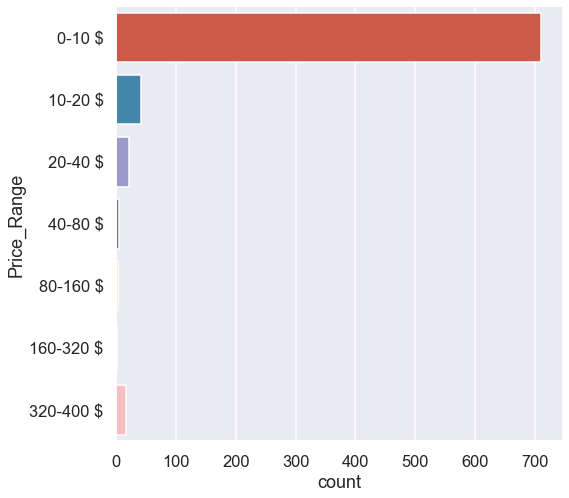

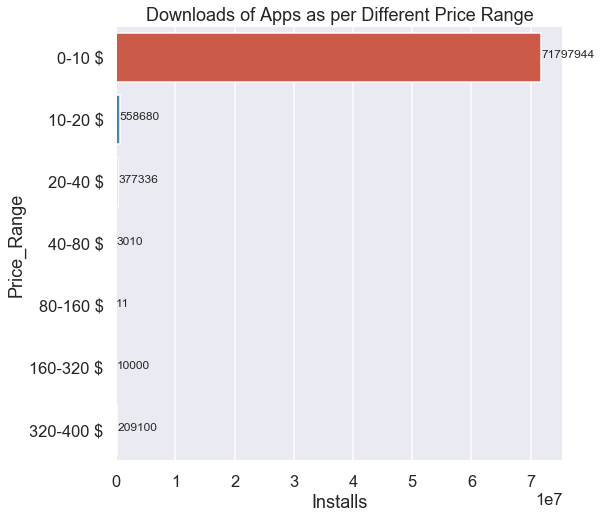

In [96]:
x = df[['Category','Installs','Type','Price']]
x = x[x['Type']=='Paid']
x = x[['Category','Installs','Price']]

x['Price_Range'] = pd.cut(x=x['Price'], bins=[0,10,20,40,80,160,320,400], labels=['0-10 $','10-20 $','20-40 $',\
                                                            '40-80 $','80-160 $','160-320 $','320-400 $'], right=True)

fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(y='Price_Range',data=x)
plt.show()

x = x[['Installs','Price_Range']]
x = x.groupby('Price_Range').agg(sum)
x.reset_index(inplace=True)
x = x.sort_values(by='Installs',ascending=False)

fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Installs',y='Price_Range',data=x)
val = x['Installs']
for i in range(len(val)):
    plt.text(x = val[i]+0.05, y = i, s = val[i], size = 12)
plt.title('Downloads of Apps as per Different Price Range')    
plt.show()

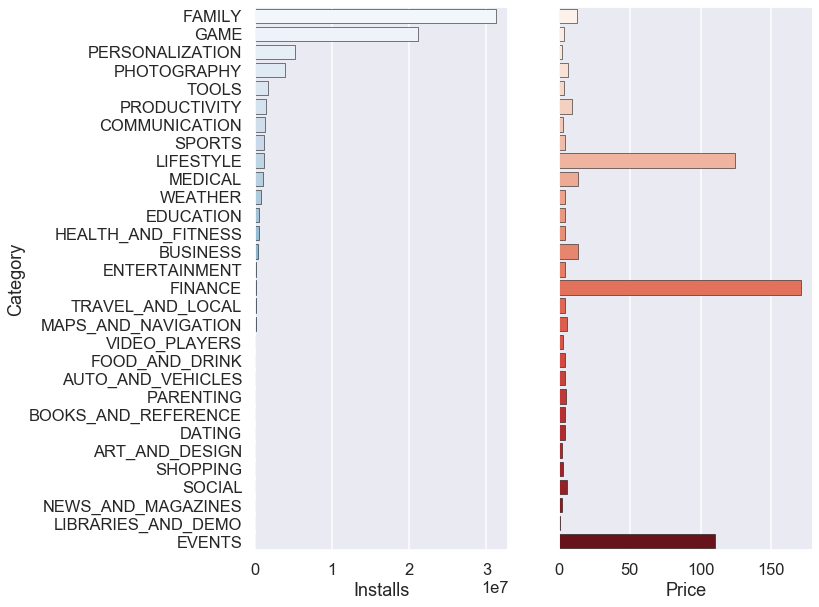

In [108]:
x = df[['Category','Installs','Type','Price']]
x = x[x['Type']=='Paid']
x = x[['Category','Installs','Price']]
x = x.groupby('Category').agg({'Installs':sum, 'Price':'mean'}).round(2)
x.sort_values(by='Installs',inplace=True,ascending=False)
x.reset_index(inplace=True)

fig,ax = plt.subplots(1,2,figsize=(10,10))
plt.style.use('ggplot')
sns.set_style('darkgrid')
sns.barplot(x="Installs", y="Category", data=x,
             color="b",ax=ax[0],edgecolor='Black',palette='Blues')

sns.barplot(x="Price", y="Category", data=x,
             color="r",ax=ax[1],edgecolor='Black',palette='Reds')
sns.set_context('talk')
ax[1].set_yticks([])
ax[1].set_ylabel('')
plt.show()



C:\Users\SHADOW\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SHADOW\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



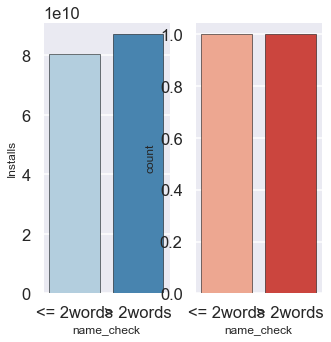

In [161]:
x = df[['App','Installs']]
x['Word_count'] = x['App'].apply(lambda y:len(y.split()))
x['name_check'] = pd.cut(x=x['Word_count'], bins=[0,2,20], labels=['<= 2words','> 2words'], right=True)
x=x.groupby('name_check').agg(sum)
x.reset_index(inplace=True)

fig,ax = plt.subplots(1,2,figsize=(5,5))
sns.barplot(x="name_check", y="Installs", data=x,
             color="b",ax=ax[0],edgecolor='Black',palette='Blues')

sns.countplot(x="name_check", data=x,
             color="r",ax=ax[1],edgecolor='Black',palette='Reds')
plt.show()